疫情数据SEIR模型拟合

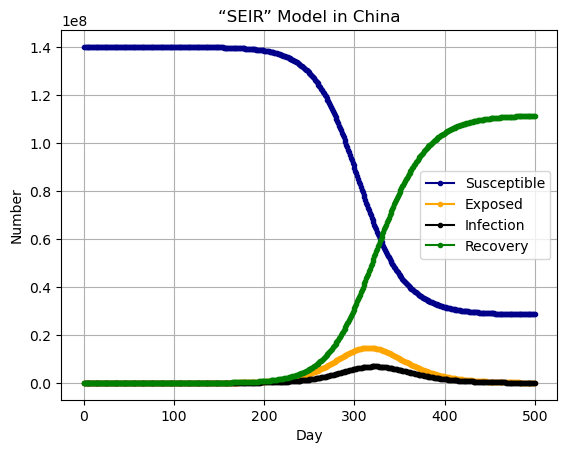

In [7]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt


# N为人群总数
N =140000000 #（中国·人口）
# β为传染率系数
beta = 0.3 #β为传染率系数
# gamma为恢复率系数
gamma = 0.15

# Te为疾病潜伏期
Te = 14

# E_0为潜伏者的初始人数
E_0 = 100
#infected 人数
I_0 =100
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - E_0 - I_0 - R_0
# T为传播时间
T = 500

# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)

#微分方程:含有未知函数及其导数的关系式，解微分方程就是找出未知函数。
#_ 可以表示某个临时变量或者无关紧要的变量
#x[1]暴露人数 x[0]S人数 疑似和感染X[1]+X[2]
#x[2]感染人数

#注：函数中的下划线表示忽略特定的值，但是有2个参数，与后面求解对应
def funcSEIR(inivalue,_):
    Y = np.zeros(4) #SEIR的各类人群人数
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] *( X[2])) / N
    # 潜伏个体变化
    Y[1] = (beta * X[0] *( X[2])) / N - X[1] / Te
    # 感染
    Y[2] = X[1] / Te- gamma* X[2]
    # 治愈
    Y[3] = gamma * X[2]

    return Y



T_range = np.arange(0,T + 1)
#类似np.range函数，但np.arange()返回的是numpy.ndarray()
#odeint()函数是scipy库中一个数值求解微分方程的函数
#odeint()函数需要至少三个参数，第一个是微分方程函数，
#第二个是微分方程初值，
#第三个是微分的自变量。
RES = spi.odeint(funcSEIR,INI,T_range)
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'black',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')


plt.title('“SEIR” Model in China')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.grid()
plt.show ()

疫情数据SEITR模型拟合（假定美国）

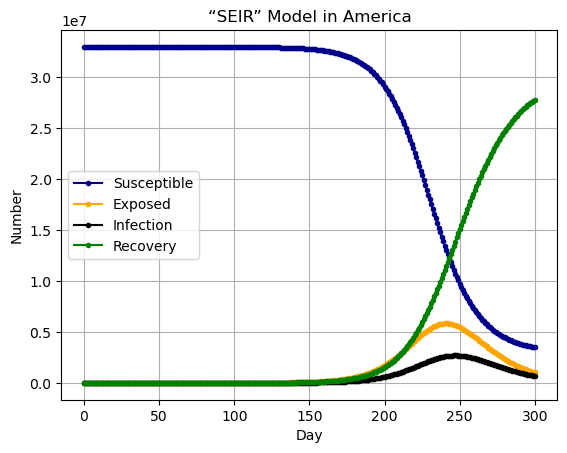

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# N为人群总数
N =33000000 #（美国人口大致为3.3亿）
# β为传染率系数
beta = 0.4 #β为传染率系数
# gamma为恢复率系数
gamma = 0.15

# Te为疾病潜伏期
Te = 14

# E_0为潜伏者的初始人数
E_0 = 10
#infected 人数
I_0 =1
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - E_0 - I_0 - R_0
# T为传播时间
T = 300


# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)

#微分方程:含有未知函数及其导数的关系式，解微分方程就是找出未知函数。
#_ 可以表示某个临时变量或者无关紧要的变量
#x[1]暴露人数 x[0]S人数 疑似和感染X[1]+X[2]
#x[2]感染人数

#注：函数中的下划线表示忽略特定的值，但是有2个参数，与后面求解对应
def funcSEIR(inivalue,_):
    Y = np.zeros(4) #SEIR的各类人群人数
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] *( X[2])) / N
    # 潜伏个体变化
    Y[1] = (beta * X[0] *( X[2])) / N - X[1] / Te
    # 感染
    Y[2] = X[1] / Te- gamma* X[2]
    # 治愈
    Y[3] = gamma * X[2]

    return Y



T_range = np.arange(0,T + 1)
#类似np.range函数，但np.arange()返回的是numpy.ndarray()
#odeint()函数是scipy库中一个数值求解微分方程的函数
#odeint()函数需要至少三个参数，第一个是微分方程函数，
#第二个是微分方程初值，
#第三个是微分的自变量。
RES = spi.odeint(funcSEIR,INI,T_range)
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'black',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')


plt.title('“SEIR” Model in America')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.grid()
plt.show ()

SEITR模型

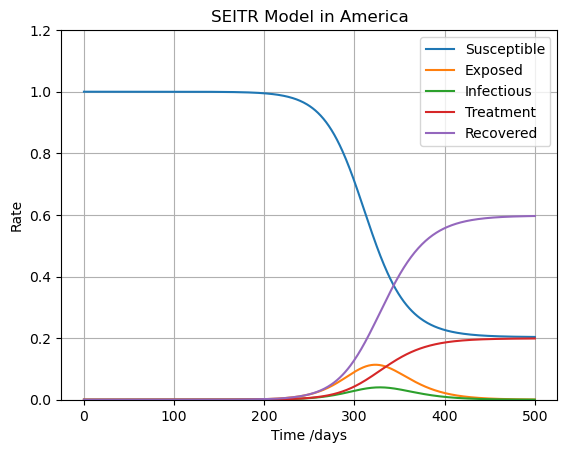

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义微分方程
def deriv(y, t, N, beta, gamma, delta, alpha):
    S, E, I, T, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - alpha * I - gamma * I
    dTdt = alpha * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dTdt, dRdt
# N为人群总数
N =33000000 #（美国人口大致为3.3亿）

# T为传播时间
T = 300
I0 = 1 # 初始感染人数
E0 = 10 # 初始暴露人数
T0 = 0 # 初始治疗人数
R0 = 0 # 初始康复人数
S0 = N - I0 - E0 - T0 - R0 # 初始易感人数

beta = 0.4 # 感染率
gamma = 0.15 # 康复率
delta = 1.0 / 14.0 # 潜伏期倒数，即潜伏期为14天
alpha = 0.05 # 治疗率

# 时间点（天）
t = np.linspace(0, 500, 500)

# 初始状态向量
y0 = S0, E0, I0, T0, R0

# 求解微分方程组
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta,alpha))
S, E, I,T,R= ret.T

# 绘制结果图像
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.plot(t,S/N,label='Susceptible')
ax.plot(t,E/N,label='Exposed')
ax.plot(t,I/N,label='Infectious')
ax.plot(t,T/N,label='Treatment')
ax.plot(t,R/N,label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Rate')
ax.set_ylim(0,1.2)
plt.title("SEITR Model in America")
legend=ax.legend()
plt.grid()
plt.show()